## Importing the essential Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict

## Task-1

In [2]:
def harris_corner_detector(image, k=0.04, window_size=3, threshold=0.01):
    Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    Sxx = cv2.GaussianBlur(Ixx, (window_size, window_size), sigmaX=1)
    Syy = cv2.GaussianBlur(Iyy, (window_size, window_size), sigmaX=1)
    Sxy = cv2.GaussianBlur(Ixy, (window_size, window_size), sigmaX=1)

    det_M = (Sxx * Syy) - (Sxy ** 2)
    trace_M = Sxx + Syy
    R = det_M - k * (trace_M ** 2)

    max_R = np.max(R)
    corners = (R > threshold * max_R).astype(np.uint8) * 255

    return R, corners

def mark_corners_on_image(image, corners, color=(0, 0, 255), radius=3, thickness=1):
    marked_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    corner_coords = np.argwhere(corners > 0)

    for (y, x) in corner_coords:
        cv2.circle(marked_image, (x, y), radius, color, thickness)
    return marked_image

def detect_and_mark_corners_opencv(image, block_size=2, ksize=3, k=0.04, threshold=0.01):
    dst = cv2.cornerHarris(image, block_size, ksize, k)
    max_dst = np.max(dst)
    dst_thresh = (dst > threshold * max_dst).astype(np.uint8) * 255

    marked_image = mark_corners_on_image(image, dst_thresh)
    return marked_image

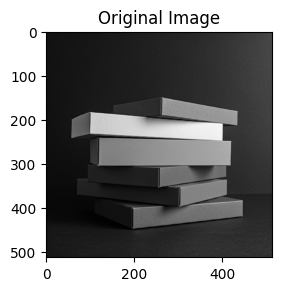

In [3]:
image_path = './boxes.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.show()

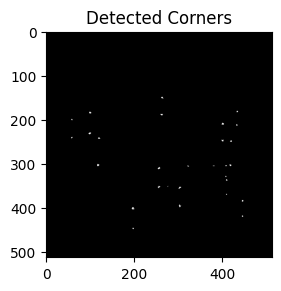

In [4]:
corner_response, detected_corners = harris_corner_detector(image)

plt.subplot(1, 2, 2)
plt.title('Detected Corners')
plt.imshow(detected_corners, cmap='gray')
plt.show()

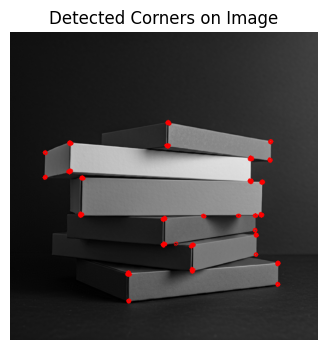

In [5]:
_, detected_corners = harris_corner_detector(image)
image_with_corners = mark_corners_on_image(image, detected_corners)

plt.figure(figsize=(4, 4))
plt.title('Detected Corners on Image')
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

The total number of corners in the image detected is: 28

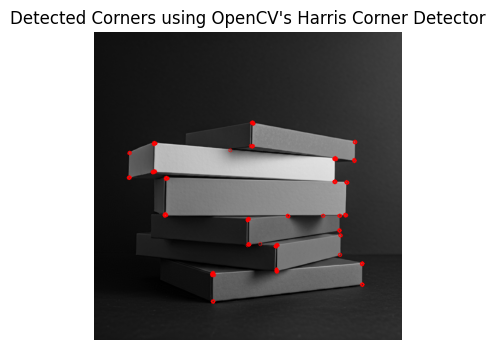

In [6]:
image_with_opencv_corners = detect_and_mark_corners_opencv(image)

plt.figure(figsize=(4, 4))
plt.title("Detected Corners using OpenCV's Harris Corner Detector")
plt.imshow(cv2.cvtColor(image_with_opencv_corners, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Task-2

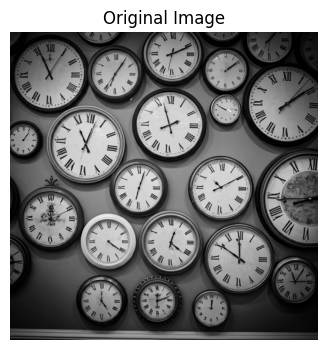

In [7]:
def canny_edge_detection(image, threshold1=100, threshold2=200):
    edges = cv2.Canny(image, threshold1, threshold2)
    return edges

image_path = './clocks.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
edge_map = canny_edge_detection(image)

plt.figure(figsize=(4, 4))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

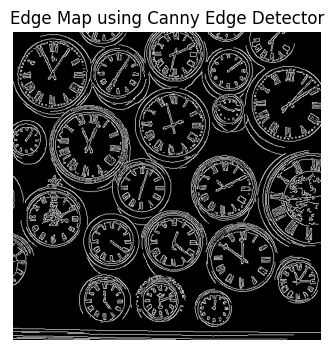

In [8]:
plt.figure(figsize=(4, 4))
plt.title("Edge Map using Canny Edge Detector")
plt.imshow(edge_map, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
def resize_image(image_path, size=(128, 128)):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        return "Image not found. Please check the file path."
    
    resized_image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
    return resized_image

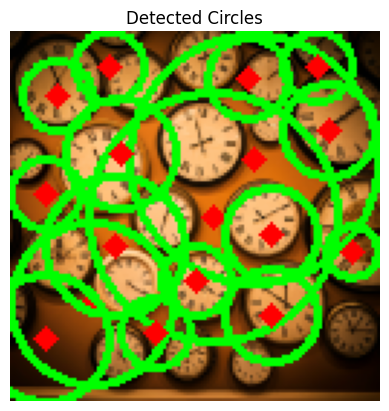

In [10]:
image = resize_image('./clocks.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)

circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=100,
    param2=30,
    minRadius=0,
    maxRadius=0
)


output_image = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output_image, (i[0], i[1]), 2, (0, 0, 255), 3)


plt.title("Detected Circles")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()